# Artificial test functions #

The functions in this notebook are a subset of the functions presented in V.Pleviris, G.Solorzano, *A Collection of 30 Multidimensional Functions for Global Optimization Benchmarking*. Here we define them in the continuous case for a general dimension $D$ and present the plots for the case $D=2$.\
As the aforementioned paper shows, most of these functions are difficult to optimize in the continuous case even for relatively small values of $D$.

### How are they used in the project? ###

Inspired by the experiments presented in F. Wang, H. Zhang, A. Zhou *A particle swarm optimization algorithm for mixed-variable optimization problems* we will adapt these functions to the mixed discrete-continuous case by considering the $D$-dimensional case for some $D$ (e.g. 4,10,50) with the first $D/2$ dimensions restricted to discrete values (the granularity of this grid is specified in the call of the optimizer, as well as the division of the variables).

In [2]:
import math 
import numpy as np
import copy
import matplotlib.pyplot as plt

To enhance the generality we define a rotation matrix to be applied to the functions.

In [3]:
from scipy.stats import special_ortho_group

def generate_random_rotation_matrix(D):
    '''
    Generates a random orthogonal matrix using scipy's special_ortho_group
    '''
    
    rotation_matrix = special_ortho_group.rvs(D)
    return rotation_matrix

C:\Users\utente\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
def rotate_vector(vector, rotation_matrix):
    '''
    Applies the rotation matrix to a vector
    '''
    
    vector = np.array(vector)
    rotated_vector = np.dot(rotation_matrix, vector)
    return list(rotated_vector)

In [25]:
def func_plot(function,minimum=-5,maximum=5,title=''):
    '''
    Plots the D=2 continuous case to get an idea of some features of the function  
    '''
    x_vals = np.linspace(minimum, maximum, 200)
    y_vals = np.linspace(minimum, maximum, 200)
    x_mesh, y_mesh = np.meshgrid(x_vals, y_vals)

    x_flat = x_mesh.flatten()
    y_flat = y_mesh.flatten()

    
    z_flat = np.vectorize(function)(x_flat, y_flat, 2,0,rotation='no')

    z_mesh = z_flat.reshape(x_mesh.shape)

    
    fig = plt.figure(figsize=(9, 6)) 
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='gnuplot')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(x, y)')
    ax.set_title(title)
    plt.show()

For the following functions *discrete* is a list that contains the discrete part of the vector, *continuous* contains the continuous part, *D* is the dimension defined above.

## Ackley’s function ##

$$f_{Ackley}(\vec{x})=-20\cdot exp \left(-0.2\sqrt{\frac{1}{D}\sum_{i=1}^D x_i^2}\right)-exp\left(\frac{1}{D}\sum_{i=1}^D cos(2\pi x_i) \right)+e+20$$ 

#### -- properties -- ####
Not-convex\
Multimodal 

#### -- preferred search interval -- ####
$[−32.768, 32.768]^D$

#### -- minimum -- ####
$0$ in $\vec{0}$

In [14]:
def rotated_ackley_func(discrete,continuous,D,rotation_matrix,rotation='yes'):
    
    if D==2:
        variable=[discrete,continuous]
    else:    
        variable= list(discrete)+list(continuous)
    
    #apply the rotation
    if rotation == 'yes':
        variable=rotate_vector(variable,rotation_matrix)

    norm_2=0
    sin_part=0
    for i in range(0,D):
        norm_2+=variable[i]**2
        sin_part+=math.cos(2*math.pi*variable[i])
    norm_2=math.sqrt(norm_2/D)
    sin_part=sin_part/D
    f=-20*math.exp(-0.2*norm_2)-math.exp(sin_part)+math.e+20
    
    return f

In [15]:
#example of use
rotated_ackley_func([2,0],[-3,1],4,generate_random_rotation_matrix(4))

7.83482417208406

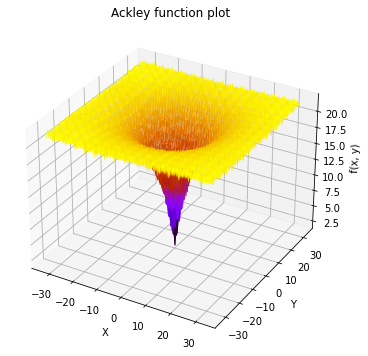

In [26]:
#plot of the function in the preferred search interval for the 2-dimensional case with no rotation
# func_plot(rotated_ackley_func,minimum=-32.768,maximum=32.768,title='Ackley function plot')

## Schaffer f7 function ##

$$f_{\text{Schaf}}(\vec{x})=\left(\frac{1}{D-1} \sum_{i=1}^{D-1}\left(\sqrt{s_i}+\sqrt{s_i}sin^2(50s_i^{1/5})\right) \right)^2 
$$
$$ \text{ where } s_i=\sqrt{x_i^2+x_{i+1}^2}$$
#### -- properties -- ####
Multimodal \
Not-separable

#### -- preferred search interval -- ####
$[-100,100]^D$

#### -- minimum -- ####
$0$ in $\vec{0}$

In [246]:
def rotated_schaffer_f7_func(discrete,continuous,D,rotation_matrix,rotation='yes'):
    
    if D==2:
        variable=[discrete,continuous]
    else:    
        variable= list(discrete)+list(continuous)
    
    #apply the rotation
    if rotation == 'yes':
        variable=rotate_vector(variable,rotation_matrix)

    s=[]
    for i in range(0,D-1):
        s+=[math.sqrt(variable[i]**2+variable[i+1]**2)]
    f=0    
    for j in range(0,D-1):
        f+=math.sqrt(s[j])+math.sqrt(s[j])*math.sin(50*(s[j])**0.2)**2
    f=(f/(D-1))**2
    
    return f

In [247]:
#example of use
rotated_schaffer_f7_func(2,-3,2,generate_random_rotation_matrix(2))

13.761645605901494

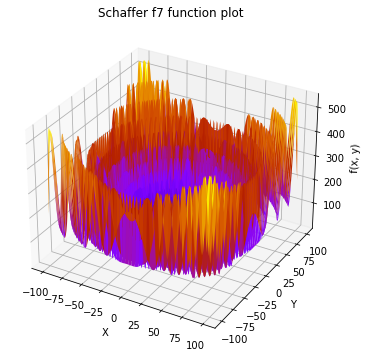

In [273]:
#plot of the function in the preferred search interval for the 2-dimensional case with no rotation
# func_plot(rotated_schaffer_f7_func,minimum=-100,maximum=100,title='Schaffer f7 function plot')

## Bent Cigar function ##

$$f_{cigar}(\vec{x})=x_1^2+10^6\sum_{i=2}^D x_i^2$$

#### -- properties -- ####
Unimodal  \
Not-separable

#### -- preferred search interval -- ####
$[-100,100]^D$

#### -- minimum -- ####
$0$ in $\vec{0}$

In [249]:
def bent_cigar_func_rotated(discrete,continuous,D,rotation_matrix,rotation='yes'):
    
    if D==2:
        variable=[discrete,continuous]
    else:    
        variable= list(discrete)+list(continuous)
    
    #apply the rotation
    if rotation == 'yes':
        variable=rotate_vector(variable,rotation_matrix)
    
    sq_var=0
    for i in range(1,D):
        sq_var+=variable[i]**2
    
    f=variable[1]**2+1000000*sq_var
    
    return f
        

In [250]:
#example of use
bent_cigar_func_rotated([0,1],[1,0],4,rotation_matrix = generate_random_rotation_matrix(4))

1939644.9548018125

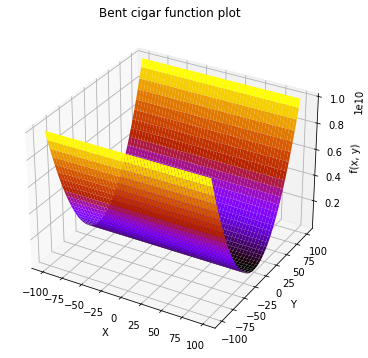

In [274]:
#plot of the function in the preferred search interval for the 2-dimensional case with no rotation
# func_plot(bent_cigar_func_rotated,minimum=-100,maximum=100,title='Bent cigar function plot')

## Schwefel 2.21 ## 

$$
f_{\text{Schwefel}}(\vec{x})=\max_{i=1,\dots,D}|x_i|
$$

#### -- properties -- ####
Convex \
Unimodal  \
Not-separable

#### -- preferred search interval -- ####
$[-100,100]^D$

#### -- minimum -- ####
$0$ in $\vec{0}$

In [252]:
def rotated_schwefel_2_21_func(discrete,continuous,D,rotation_matrix,rotation='yes'):
    
    if D==2:
        variable=[discrete,continuous]
    else:    
        variable= list(discrete)+list(continuous)
    
    #apply the rotation
    if rotation == 'yes':
        variable=rotate_vector(variable,rotation_matrix)
        
    for i in range(0,len(variable)):
        variable[i]=abs(variable[i]) 
    
    f=max(variable)
    return f
    

In [253]:
#example of use
rotated_schwefel_2_21_func(-2,-3,2,generate_random_rotation_matrix(2))

3.5400905077492495

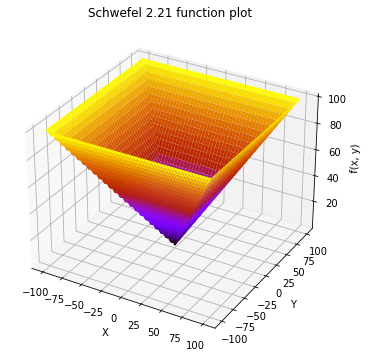

In [275]:
#plot of the function in the preferred search interval for the 2-dimensional case with no rotation
# func_plot(rotated_schwefel_2_21_func,minimum=-100,maximum=100,title='Schwefel 2.21 function plot')

## Salomon function ##

$$f_{Salomon}(\vec{x})=1-cos\left(2\pi \sqrt{\sum_{i=1}^D x_i^2} \right)+0.1 \sqrt{\sum_{i=1}^D x_i^2}
$$
#### -- properties -- ####
Not-convex \
Multimodal  \
Not-separable

#### -- preferred search interval -- ####
$[-20,20]^D$

#### -- minimum -- ####
$0$ in $\vec{0}$

In [255]:
def salomon_func_rotated(discrete,continuous,D,rotation_matrix,rotation='yes'):
    
    if D==2:
        variable=[discrete,continuous]
    else:    
        variable= list(discrete)+list(continuous)
    
    #apply the rotation
    if rotation == 'yes':
        variable=rotate_vector(variable,rotation_matrix)
    
    n_2 = np.linalg.norm(variable)
    f=1-math.cos(2*math.pi*n_2)+0.1*n_2
    return f
    

In [256]:
#example of use
salomon_func_rotated([0,2],[0.1,0],4,generate_random_rotation_matrix(4))

0.2003730574976425

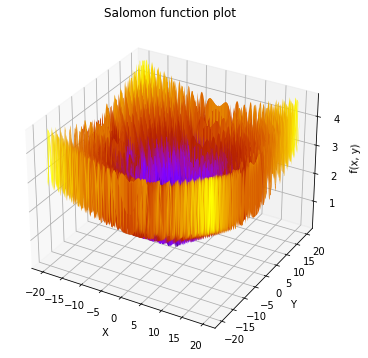

In [276]:
#plot of the function in the preferred search interval for the 2-dimensional case with no rotation
# func_plot(salomon_func_rotated,minimum=-20,maximum=20,title='Salomon function plot')

## Dropwave function ##

$$f_{Dropwave}(\vec{x})=1-\frac{1+cos\left(12 \sqrt{\sum_{i=1}^D x_i^2} \right)}{0.5 \sum_{i=1}^D x_i^2 +2}
$$

#### -- properties -- ####
Multimodal  

#### -- preferred search interval -- ####
$[-5.12,5.12]^D$

#### -- minimum -- ####
$0$ in $\vec{0}$

In [258]:
def dropwave_func_rotated(discrete,continuous,D,rotation_matrix,rotation='yes'):
    
    if D==2:
        variable=[discrete,continuous]
    else:    
        variable= list(discrete)+list(continuous)
    
    #apply the rotation
    if rotation == 'yes':
        variable=rotate_vector(variable,rotation_matrix)
    
    n_2 = np.linalg.norm(variable)
    f=1-(1+math.cos(12*n_2))/(0.5*(n_2)**2+2)
    return f

In [259]:
#example of use
dropwave_func_rotated([0,0,0],[0,0,0],4,generate_random_rotation_matrix(6))

0.0

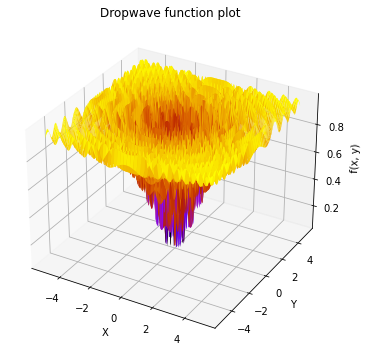

In [277]:
#plot of the function in the preferred search interval for the 2-dimensional case with no rotation
# func_plot(dropwave_func_rotated,minimum=-5.12,maximum=5.12,title='Dropwave function plot')

## Alpine 1 ##

$$f_{Alpine}(\vec{x})=\sum_{i=1}^D |x_i sin(x_i)+0.1x_i|$$
#### -- properties -- ####
Not-convex\
Multimodal \
Differentiable

#### -- preferred search interval -- ####
$[-10,10]^D$

#### -- minimum -- ####
$0$ in $\vec{0}$

In [261]:
def alpine1_func_rotated(discrete,continuous,D,rotation_matrix,rotation='yes'):
    
    if D==2:
        variable=[discrete,continuous]
    else:    
        variable= list(discrete)+list(continuous)
    
    #apply the rotation
    if rotation == 'yes':
        variable=rotate_vector(variable,rotation_matrix)
    
    f=0
    for i in range(0,D):
        f+=abs(variable[i]*math.sin(variable[i])+0.1*variable[i])
    return f    

In [262]:
#example of use
alpine1_func_rotated([-0.5,0],[0,1],4,generate_random_rotation_matrix(4))

1.1230930317550114

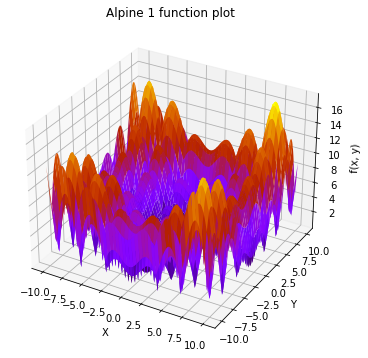

In [278]:
#plot of the function in the preferred search interval for the 2-dimensional case with no rotation
# func_plot(alpine1_func_rotated,minimum=-10,maximum=10,title='Alpine 1 function plot')